In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import os
import sys
sys.path.append(os.path.abspath('../utils'))
from transformer_pipeline import get_features_transformer,drop_rows

In [3]:
df = pd.read_csv("../data/movie_statistic_dataset.csv")


In [4]:
df = drop_rows(df)

In [5]:
transformer = get_features_transformer()
X = transformer.fit_transform(df)

In [6]:
type(X)

numpy.ndarray

In [7]:
transformer.get_feature_names_out().shape

(20,)

In [8]:
X.shape

(3490, 20)

In [9]:
colnames = transformer.get_feature_names_out()
colnames = [col.replace('_', '\\_') for col in colnames]

In [10]:
df_transformed = pd.DataFrame(X, columns = colnames)

In [11]:
df_transformed.head()

,non\_numeric\_\_genres\_OHE\_\_is\_genres\_Action,non\_numeric\_\_genres\_OHE\_\_is\_genres\_Adventure,non\_numeric\_\_genres\_OHE\_\_is\_genres\_Comedy,non\_numeric\_\_genres\_OHE\_\_is\_genres\_Crime,non\_numeric\_\_genres\_OHE\_\_is\_genres\_Drama,non\_numeric\_\_genres\_OHE\_\_is\_genres\_Other,non\_numeric\_\_director\_professions\_OHE\_\_is\_director\_professions\_Other,non\_numeric\_\_director\_professions\_OHE\_\_is\_director\_professions\_director,non\_numeric\_\_director\_professions\_OHE\_\_is\_director\_professions\_producer,non\_numeric\_\_director\_professions\_OHE\_\_is\_director\_professions\_writer,non\_numeric\_\_production\_date\_split\_\_production\_year,non\_numeric\_\_production\_date\_split\_\_production\_month,non\_numeric\_\_directors\_age\_\_director\_age,non\_numeric\_\_directors\_age\_\_director\_is\_alive,non\_numeric\_\_director\_\_director\_code,non\_numeric\_\_is\_continuation\_\_is\_continuation,numeric\_\_WW\_gross\_$\_box\_cox\_\_Worldwide gross $,numeric\_\_Production\_budget\_\_Production budget $,numeric\_\_runtime\_minutes\_Robust\_\_runtime\_minutes,numeric\_\_approval\_index\_\_approval\_Index
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2022.0,12.0,68.0,1.0,0.0,1.0,11.019243,9.094734,3.919622,1.435311
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2011.0,5.0,51.0,1.0,1.0,1.0,4.764096,7.340758,1.221113,0.829826
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2015.0,4.0,51.0,1.0,2.0,1.0,6.556245,7.037602,1.417368,1.552652
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2017.0,11.0,51.0,1.0,3.0,0.0,2.766049,5.630090,0.387028,0.404048
4,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2015.0,10.0,50.0,1.0,4.0,0.0,3.909877,5.630090,1.760815,0.909311


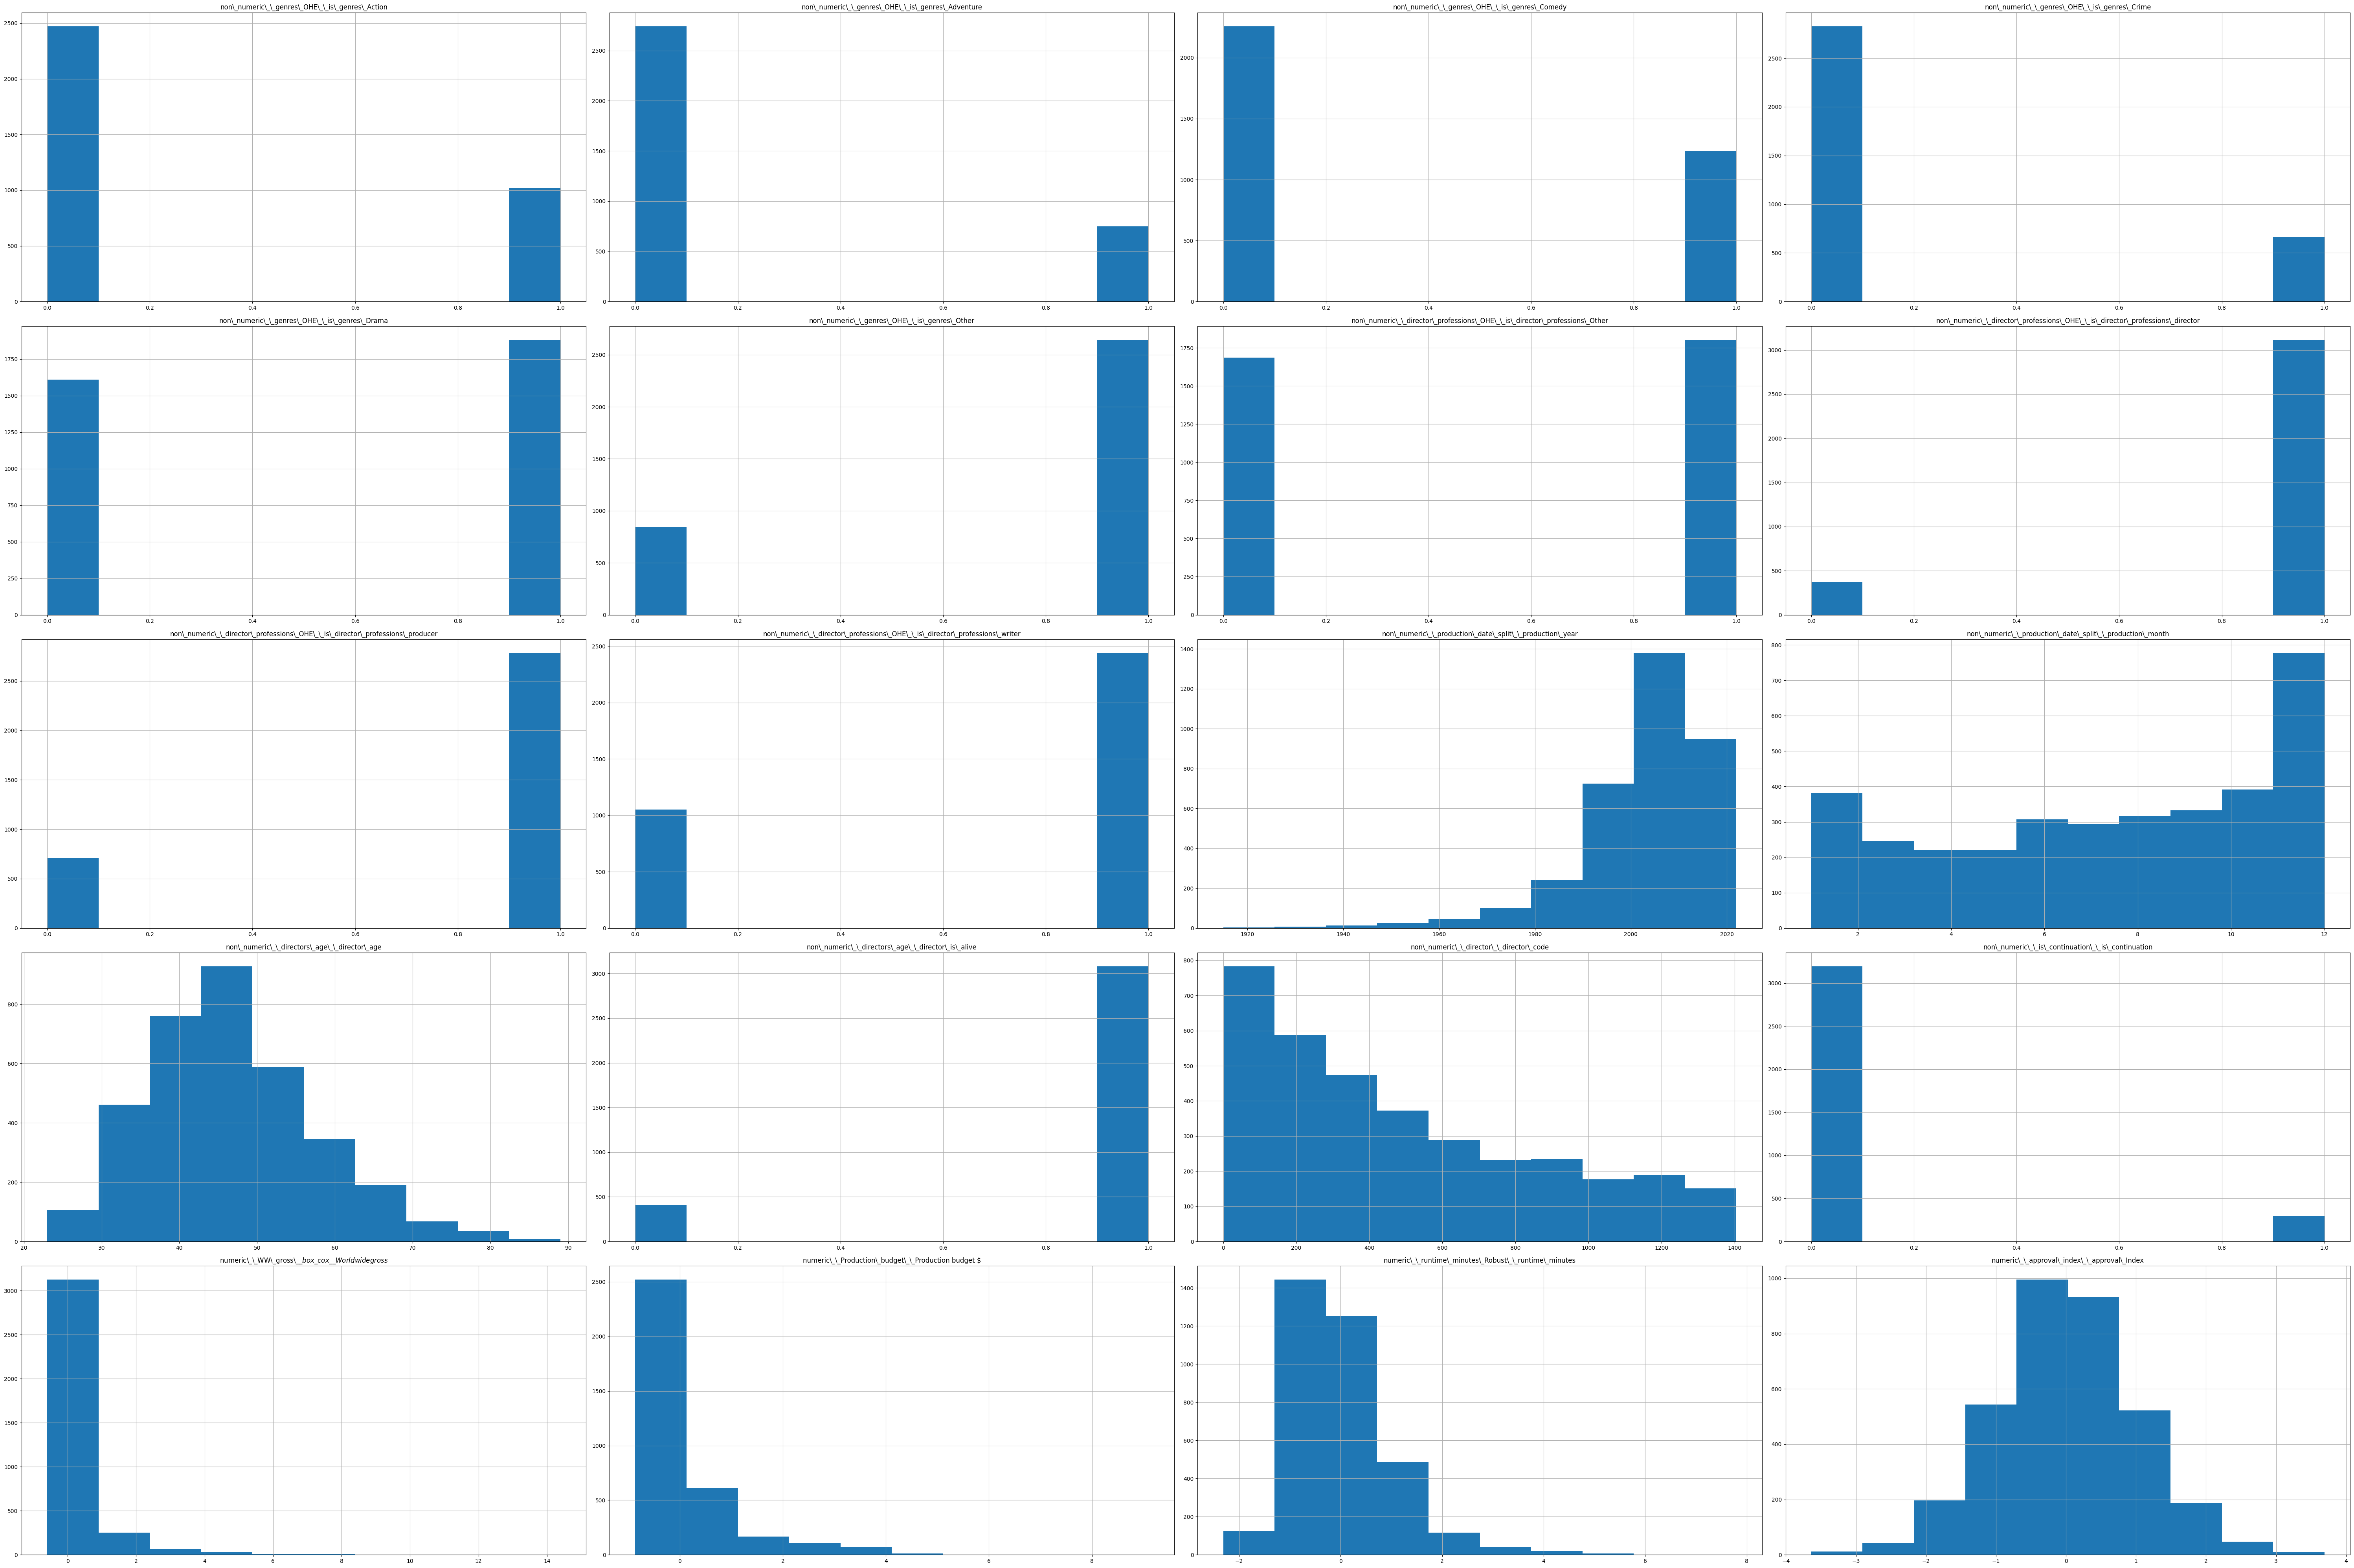

In [12]:
df_transformed.hist(figsize=(60,40))
plt.tight_layout() 
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler

df_transformed_scaled = MinMaxScaler().fit_transform(df_transformed)

In [14]:
variance = df_transformed_scaled.var(axis = 0)
for i,v in enumerate(variance):
    print(df_transformed.columns.values[i], ":", v)

non\_numeric\_\_genres\_OHE\_\_is\_genres\_Action : 0.20684559240071562
non\_numeric\_\_genres\_OHE\_\_is\_genres\_Adventure : 0.16871782661882664
non\_numeric\_\_genres\_OHE\_\_is\_genres\_Comedy : 0.22856167026542826
non\_numeric\_\_genres\_OHE\_\_is\_genres\_Crime : 0.15405981888490136
non\_numeric\_\_genres\_OHE\_\_is\_genres\_Drama : 0.24845904385020792
non\_numeric\_\_genres\_OHE\_\_is\_genres\_Other : 0.18364578287534325
non\_numeric\_\_director\_professions\_OHE\_\_is\_director\_professions\_Other : 0.24972381179137276
non\_numeric\_\_director\_professions\_OHE\_\_is\_director\_professions\_director : 0.09567934581818105
non\_numeric\_\_director\_professions\_OHE\_\_is\_director\_professions\_producer : 0.1618811832415255
non\_numeric\_\_director\_professions\_OHE\_\_is\_director\_professions\_writer : 0.21057101337427633
non\_numeric\_\_production\_date\_split\_\_production\_year : 0.015852662871484253
non\_numeric\_\_production\_date\_split\_\_production\_month : 0.0941187973

In [15]:
variance.mean()

0.11724219928555564

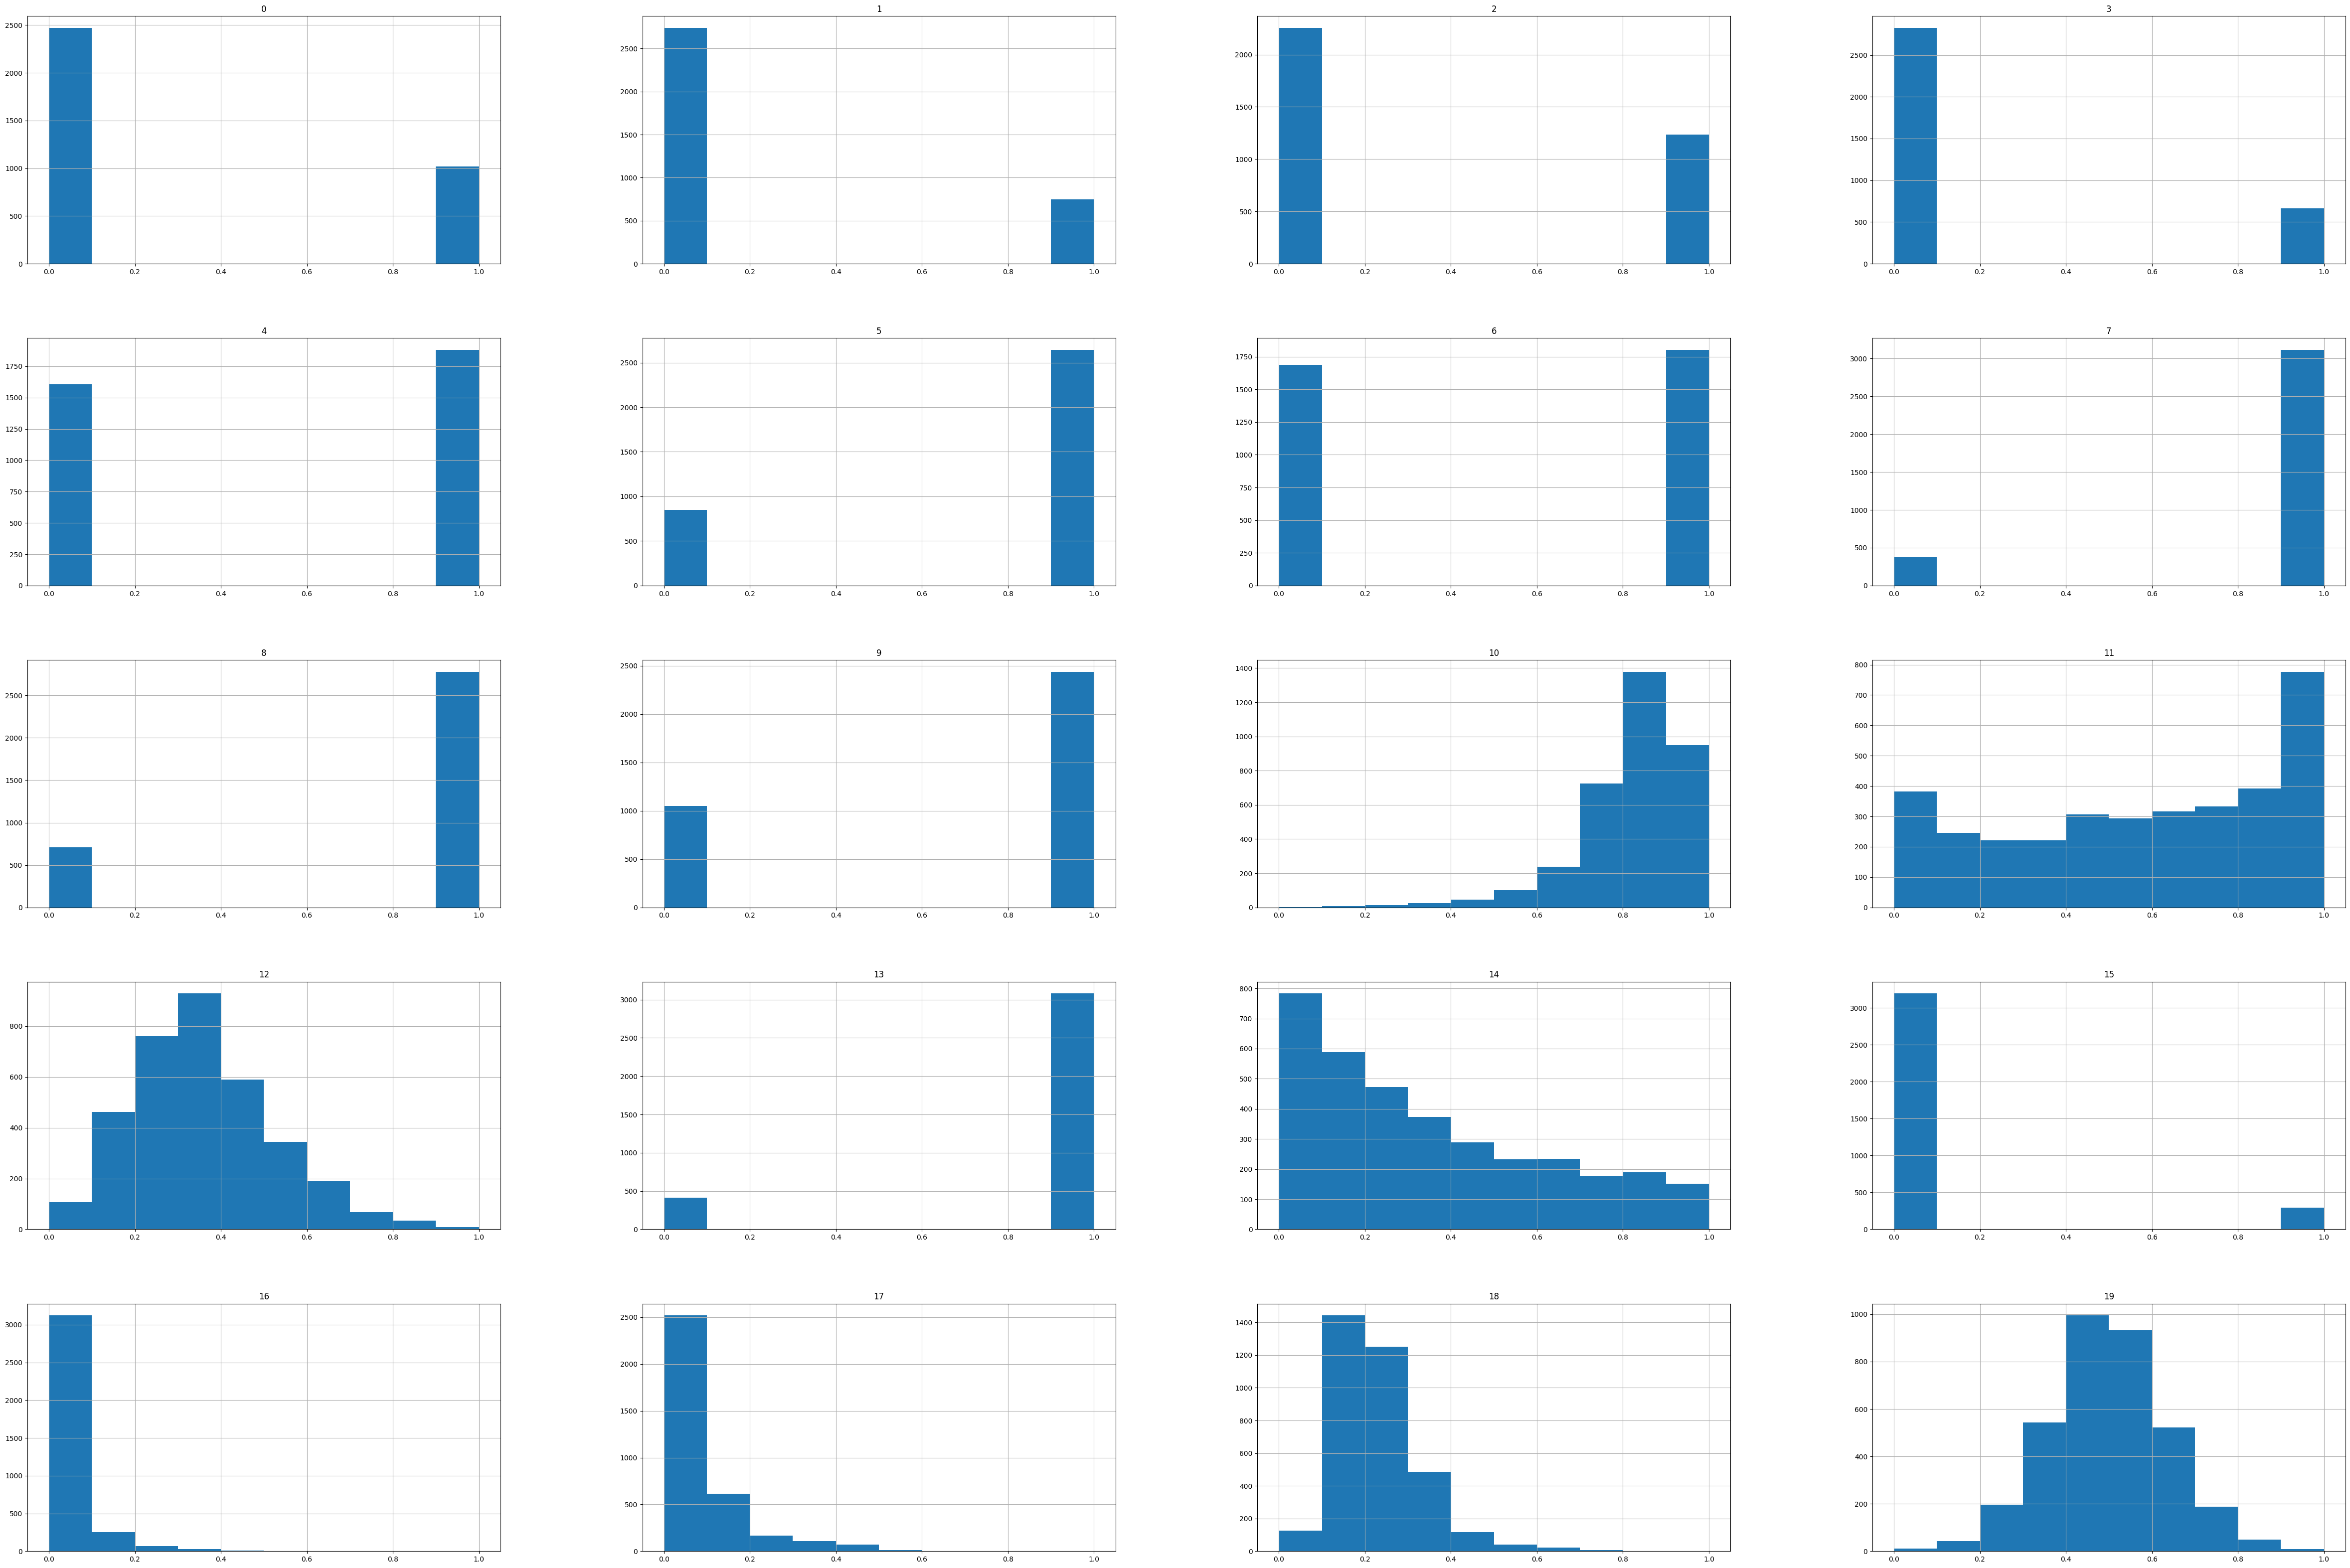

In [16]:
pd.DataFrame(df_transformed_scaled).hist(figsize=(60,40))
plt.show()

0,1,4,5,7,22,33